<a href="https://colab.research.google.com/github/colly00/Assessment-Object-Detection/blob/main/object_detection_yolo_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Mount Google Drive
# ==========================================
from google.colab import drive
drive.mount('/content/drive')

# Set dataset directory
DATASET_DIR = "/content/drive/MyDrive/Yolov8.v1i.yolov5pytorch"
print("Dataset located at:", DATASET_DIR)

Mounted at /content/drive
Dataset located at: /content/drive/MyDrive/Yolov8.v1i.yolov5pytorch


In [4]:
# Clone YOLOv5 repo
!git clone https://github.com/ultralytics/yolov5.git
%cd yolov5

#  Install dependencies
!pip install -r requirements.txt


Cloning into 'yolov5'...
remote: Enumerating objects: 17581, done.
remote: Counting objects: 100% (71/71), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 17581 (delta 40), reused 12 (delta 10), pack-reused 17510 (from 3)
Receiving objects: 100% (17581/17581), 16.66 MiB | 29.67 MiB/s, done.
Resolving deltas: 100% (12042/12042), done.
/content/yolov5
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.2 MB/s eta 0:00:00


In [5]:
#Filter Dataset (Keep only 4 classes)
# ==========================================
import os

# Define classes
all_classes = ['Couch', 'Door', 'Kitchen Cabinet', 'Microwave',
               'Refrigerator', 'Sink', 'TV', 'Table', 'Wall', 'Window']
classes_to_keep = ['Couch', 'Door', 'Microwave', 'Window']

# Build class map
class_map = {i: (classes_to_keep.index(c) if c in classes_to_keep else None)
             for i, c in enumerate(all_classes)}
print("Class remap:", class_map)

splits = ["train", "valid", "test"]
for split in splits:
    label_dir = os.path.join(DATASET_DIR, split, "labels")
    for file in os.listdir(label_dir):
        if not file.endswith(".txt"):
            continue
        path = os.path.join(label_dir, file)
        new_lines = []
        with open(path, "r") as f:
            for line in f:
                parts = line.strip().split()
                if not parts:
                    continue
                cls, coords = int(parts[0]), parts[1:]
                new_cls = class_map[cls]
                if new_cls is not None:
                    new_lines.append(" ".join([str(new_cls)] + coords))
        with open(path, "w") as f:
            f.write("\n".join(new_lines))

print("✅ Dataset filtered to 4 classes only.")


Class remap: {0: 0, 1: 1, 2: None, 3: 2, 4: None, 5: None, 6: None, 7: None, 8: None, 9: 3}
✅ Dataset filtered to 4 classes only.


In [6]:
#Create new data.yaml

yaml_content = f"""train: {DATASET_DIR}/train/images
val: {DATASET_DIR}/valid/images
test: {DATASET_DIR}/test/images

nc: 4
names: {classes_to_keep}
"""

with open(f"{DATASET_DIR}/data.yaml", "w") as f:
    f.write(yaml_content)

print("✅ data.yaml updated")
!cat {DATASET_DIR}/data.yaml

✅ data.yaml updated
train: /content/drive/MyDrive/Yolov8.v1i.yolov5pytorch/train/images
val: /content/drive/MyDrive/Yolov8.v1i.yolov5pytorch/valid/images
test: /content/drive/MyDrive/Yolov8.v1i.yolov5pytorch/test/images

nc: 4
names: ['Couch', 'Door', 'Microwave', 'Window']


In [7]:
#Train YOLOv5 Model
%cd yolov5
!python train.py --img 640 --batch 16 --epochs 60 \
  --data {DATASET_DIR}/data.yaml \
  --weights yolov5s.pt --cache
%cd ..

[Errno 2] No such file or directory: 'yolov5'
/content/yolov5
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
wandb: WARNING ⚠️ wandb is deprecated and will be removed in a future release. See supported integrations at https://github.com/ultralytics/yolov5#integrations.
2025-09-13 07:56:20.030247: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1757750180.050227    2307 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1757750180.056224    2307 cuda_blas.cc:1407] Unable to register cuBLA

In [10]:
#Evaluate on Test Set
from yolov5 import val

results, maps, times = val.run(
    data=f"{DATASET_DIR}/data.yaml",
    weights=['yolov5/runs/train/exp/weights/best.pt'],
    batch_size=32,
    imgsz=640,
    task='test'
)

precision, recall, map50, map5095 = results[:4]
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"mAP@0.5: {map50:.3f}")
print(f"mAP@0.5:0.95: {map5095:.3f}")


YOLOv5 🚀 v7.0-430-g459d8bf0 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/drive/MyDrive/Yolov8.v1i.yolov5pytorch/test/labels.cache... 25 images, 6 backgrounds, 0 corrupt: 100%|██████████| 25/25 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 1/1 [00:01<00:00,  1.64s/it]
                   all         25         38      0.914      0.827      0.889      0.764
                 Couch         25         15      0.964          1      0.995      0.917
                  Door         25         16      0.824      0.625       0.81      0.644
             Microwave         25          7      0.952      0.857      0.862      0.731
Speed: 0.4ms pre-process, 4.6ms inference, 7.0ms NMS per image at shape (32, 3, 640, 640)
Results saved to yolov5/runs/val/exp2


Precision: 0.914
Recall: 0.827
mAP@0.5: 0.889
mAP@0.5:0.95: 0.764


In [29]:
# Evaluate on Validation Set
from yolov5 import val

results, maps, times = val.run(
    data=f"{DATASET_DIR}/data.yaml",
    weights=['yolov5/runs/train/exp/weights/best.pt'],
    batch_size=32,
    imgsz=640,
    task='val',       # 🔑 use val instead of test
    plots=True        # ensures confusion_matrix.png and others are saved
)

precision, recall, map50, map5095 = results[:4]
print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"mAP@0.5: {map50:.3f}")
print(f"mAP@0.5:0.95: {map5095:.3f}")


YOLOv5 🚀 v7.0-430-g459d8bf0 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
val: Scanning /content/drive/MyDrive/Yolov8.v1i.yolov5pytorch/valid/labels.cache... 49 images, 17 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100%|██████████| 2/2 [00:02<00:00,  1.02s/it]
                   all         49         60      0.839      0.911      0.927      0.815
                 Couch         49         20      0.787          1      0.963      0.905
                  Door         49         25      0.864        0.8      0.911      0.747
             Microwave         49         15      0.866      0.933      0.907      0.792
Speed: 0.3ms pre-process, 17.0ms inference, 4.2ms NMS per image at shape (32, 3, 640, 640)
Results saved to yolov5/runs/val/exp9


Precision: 0.839
Recall: 0.911
mAP@0.5: 0.927
mAP@0.5:0.95: 0.815


Saving 000310000110101_jpg.rf.a12b4152d974e4d49ec88ccf14ccae40.jpg to 000310000110101_jpg.rf.a12b4152d974e4d49ec88ccf14ccae40.jpg


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-430-g459d8bf0 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


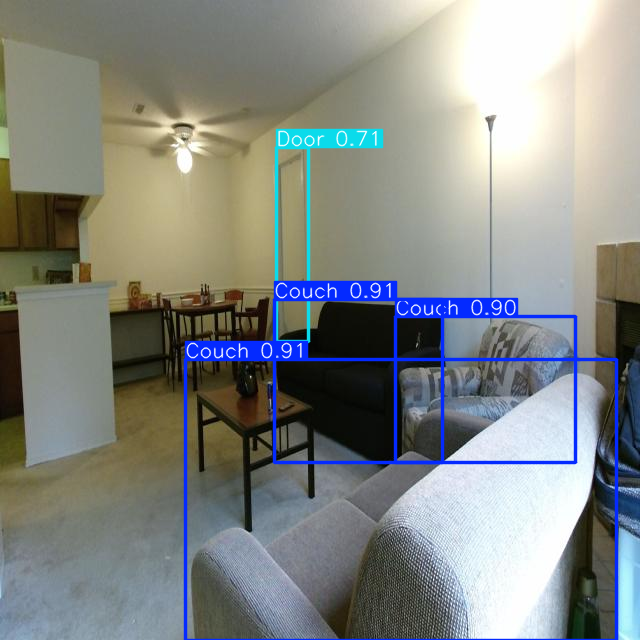

Saved 1 image to runs/detect/exp


✅ Detection complete. Check runs/detect/exp for output.


In [11]:
#Predict on a New Image
import torch
from google.colab import files

# Upload a test image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load trained model
model = torch.hub.load('ultralytics/yolov5', 'custom',
                       path='yolov5/runs/train/exp/weights/best.pt')

# Inference
results = model(image_path)
results.show()
results.save()

print("✅ Detection complete. Check runs/detect/exp for output.")

Saving 000310010150101_jpg.rf.8e193af5e71bed430070ae17c7898bc7.jpg to 000310010150101_jpg.rf.8e193af5e71bed430070ae17c7898bc7.jpg


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 v7.0-430-g459d8bf0 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)

Fusing layers... 
Model summary: 157 layers, 7020913 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 
/content/yolov5/models/common.py:906: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with amp.autocast(autocast):


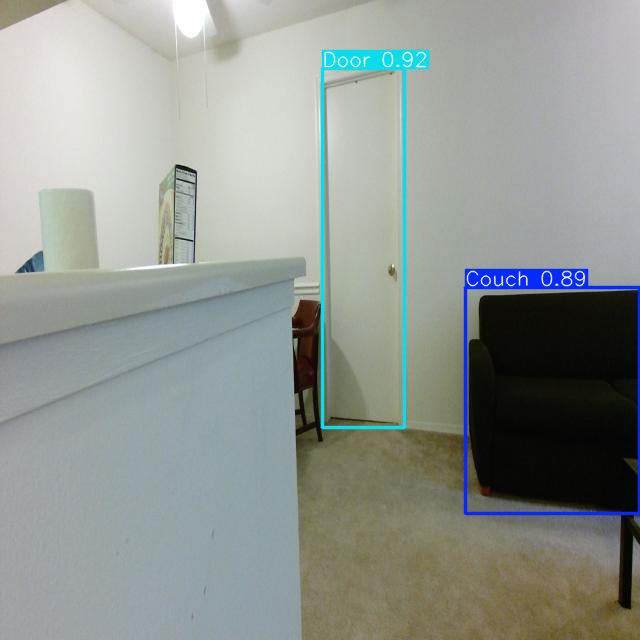

Saved 1 image to runs/detect/exp5


✅ Detection complete. Check runs/detect/exp for output.


In [15]:
#Predict on a New Image
import torch
from google.colab import files

# Upload a test image
uploaded = files.upload()
image_path = list(uploaded.keys())[0]

# Load trained model
model = torch.hub.load('ultralytics/yolov5', 'custom',
                       path='yolov5/runs/train/exp/weights/best.pt')

# Inference
results = model(image_path)
results.show()
results.save()

print("✅ Detection complete. Check runs/detect/exp for output.")